In [1]:
#Lab | Cleaning categorical data
#For this lab, we will be using the dataset in the Customer Analysis Business Case. 
#This dataset can be found in files_for_lab folder. 
#In this lab we will explore categorical data. 
#You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

In [2]:
#Instructions

#1. Import the necessary libraries if you are starting a new notebook.

#2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

#3. What should we do with the customer_id column?

#4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
    #numerical_df = customer_df.select_dtypes()
    #categorical_df = customer_df.select_dtypes()
    
#5. Plot every categorical variable. What can you see in the plots? 
    #Note that in the previous lab you used a bar plot to plot categorical data, 
    #with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 
    #However, this time you will try a different plot. 
    #This time in each plot for the categorical variable you will have, 
    #each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
    
#6. For the categorical data, check if there is any data cleaning that need to perform.
    #Hint: You can use the function value_counts() on each of the categorical columns
    #and check the representation of different categories in each column. 
    #Discuss if this information might in some way be used for data cleaning.

### 1. Import the necessary libraries if you are starting a new notebook.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().


In [4]:
customer_df=pd.read_csv(r'C:\Users\TOSHIBA\Downloads\Ironhack\Labs\we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 3. What should we do with the customer_id column?

In [6]:
#Drop it, I consider it irrelevant to the rest of the data.
customer_df=customer_df.drop(columns=['Customer'])

### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
    #numerical_df = customer_df.select_dtypes()
    #categorical_df = customer_df.select_dtypes()

In [7]:
#Vemos tamano de la tabla
customer_df.shape

(9134, 23)

In [8]:
#Conocemos el tipo de variables con las que contamos
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [9]:
customer_df['Effective To Date']=pd.to_datetime(customer_df['Effective To Date'])

In [10]:
#Queremos asegurarnos de que los valores de la columna son realmente categoricos
customer_df['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [11]:
#Separamos data numerica de categorica
numerical_df = customer_df.select_dtypes(exclude=object)
categorical_df = customer_df.select_dtypes(include=object)

In [12]:
numerical_df

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,0,3,691.200000


In [13]:
categorical_df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 5. Plot every categorical variable. What can you see in the plots? 
    #Note that in the previous lab you used a bar plot to plot categorical data, 
    #with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 
    #However, this time you will try a different plot. 
    #This time in each plot for the categorical variable you will have, 
    #each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

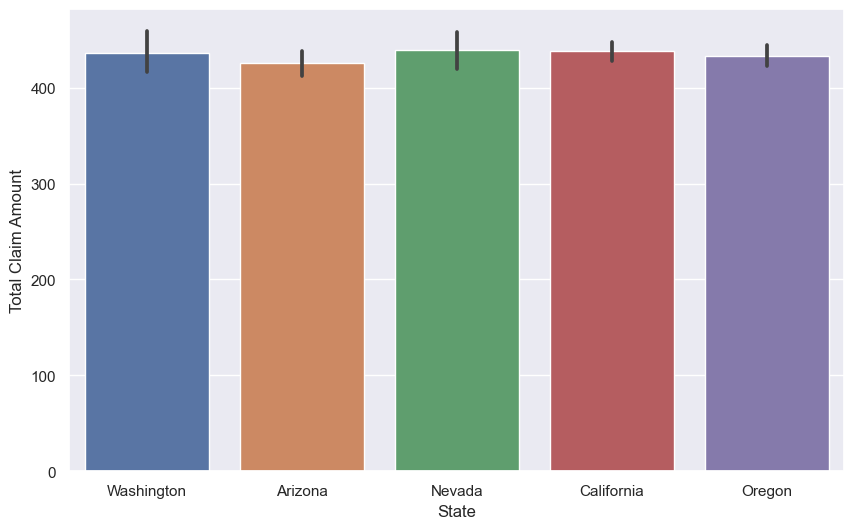

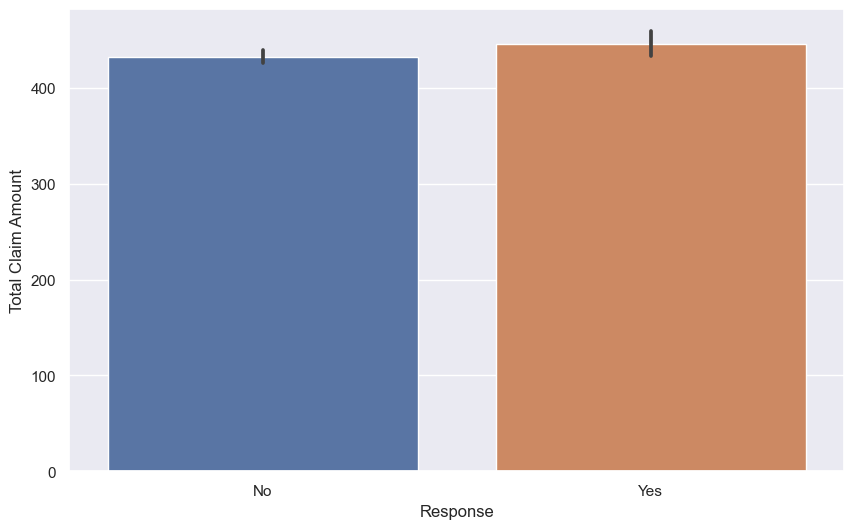

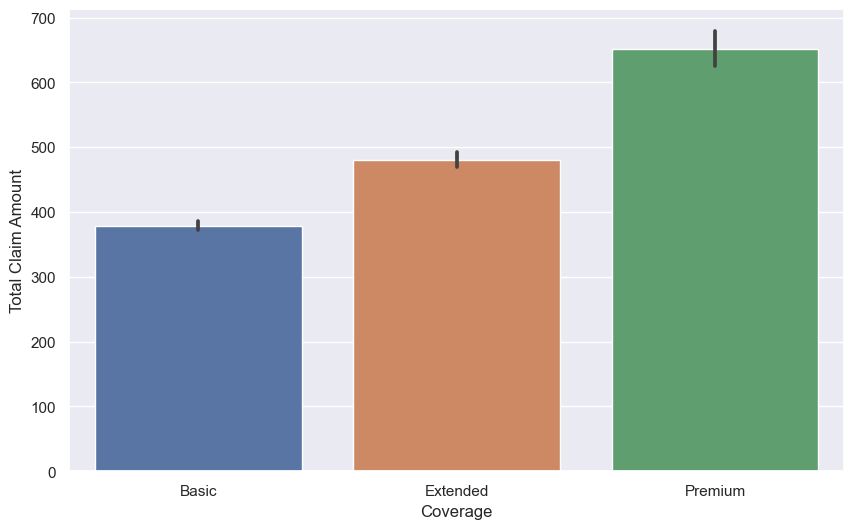

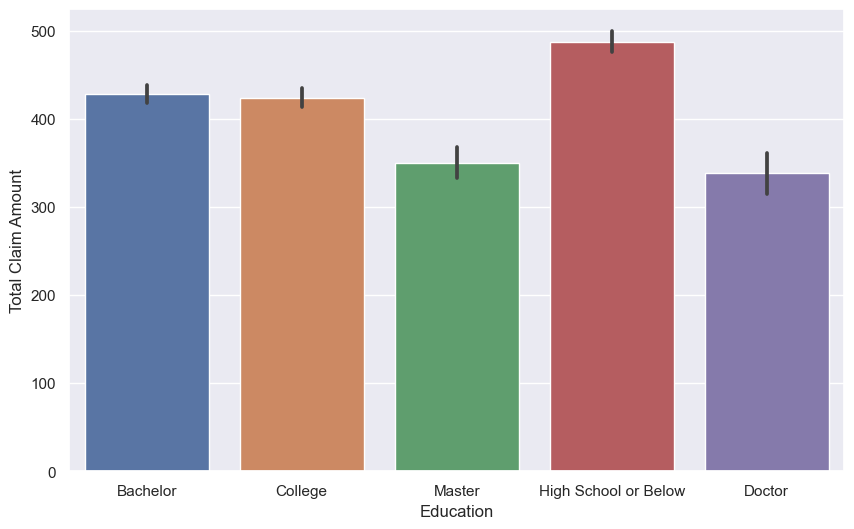

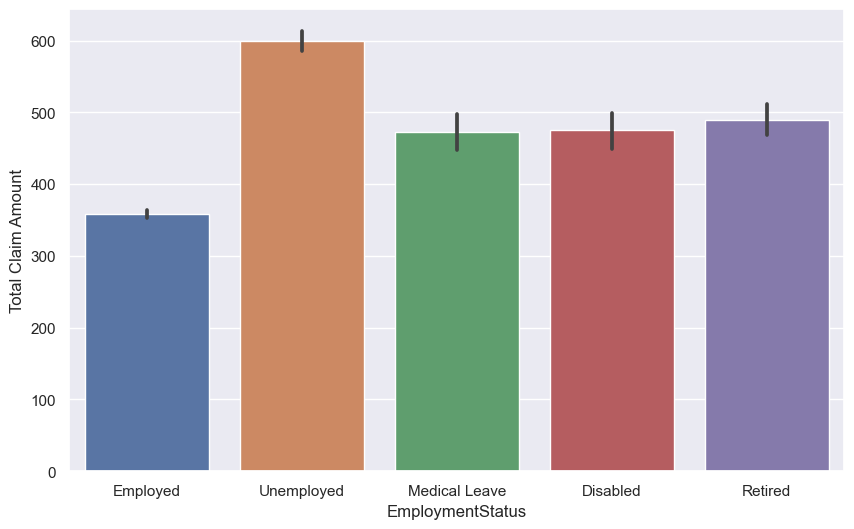

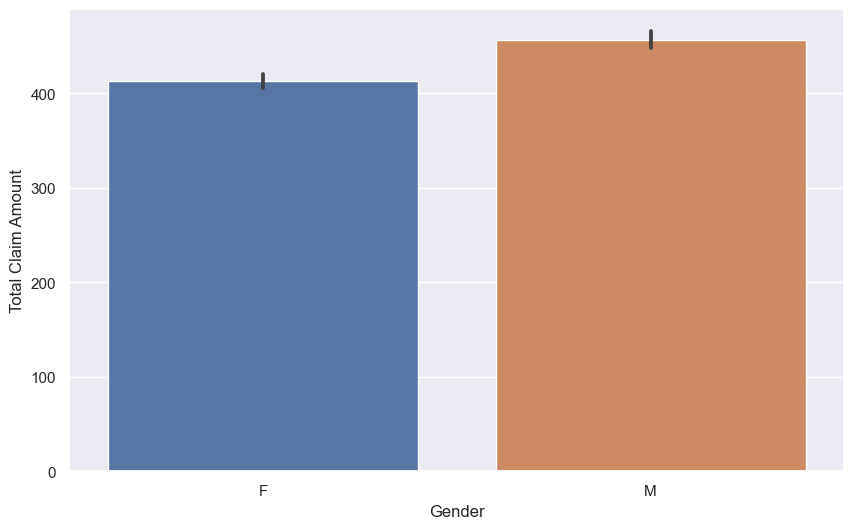

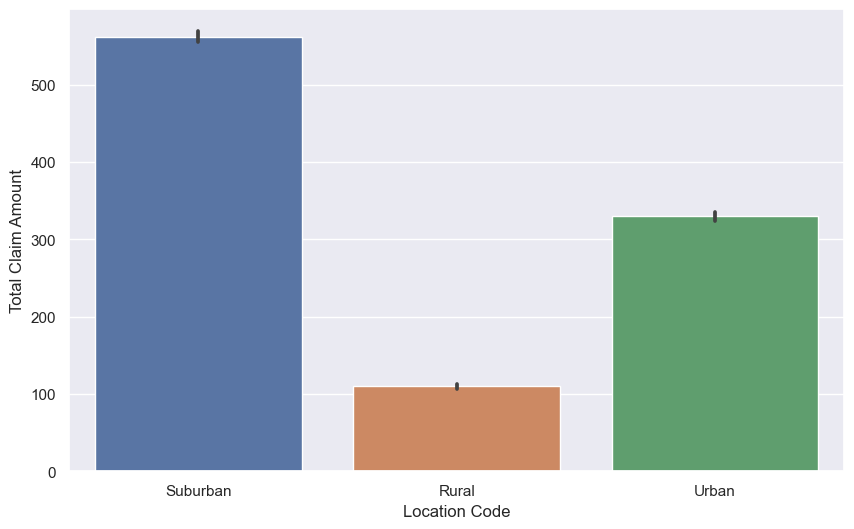

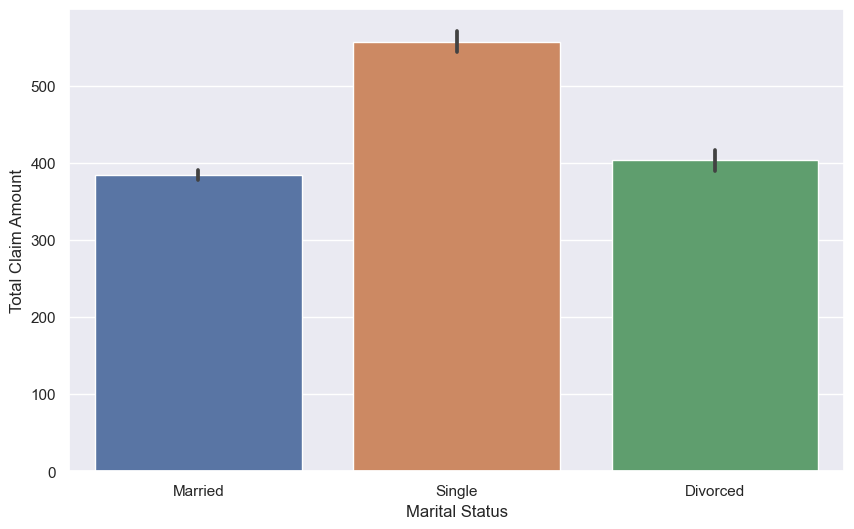

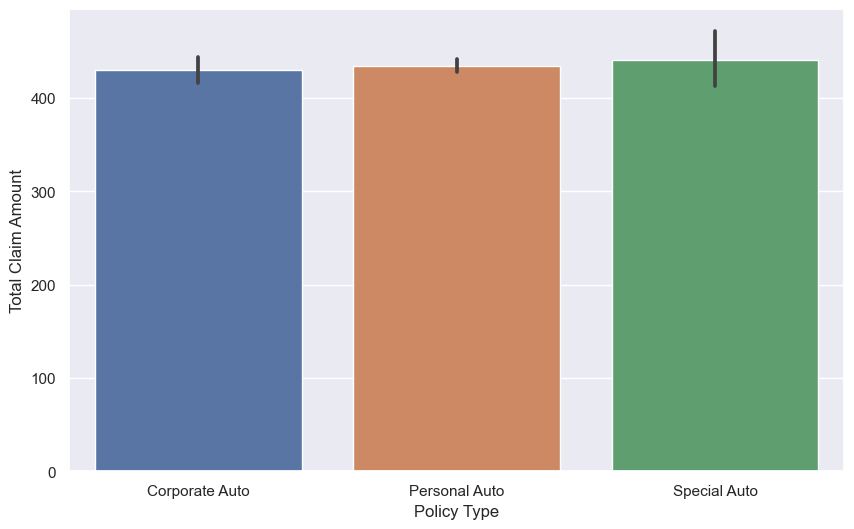

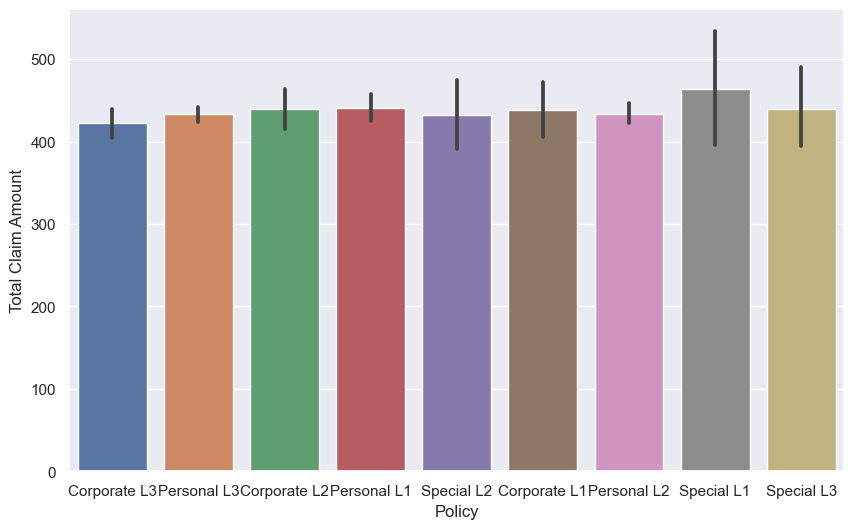

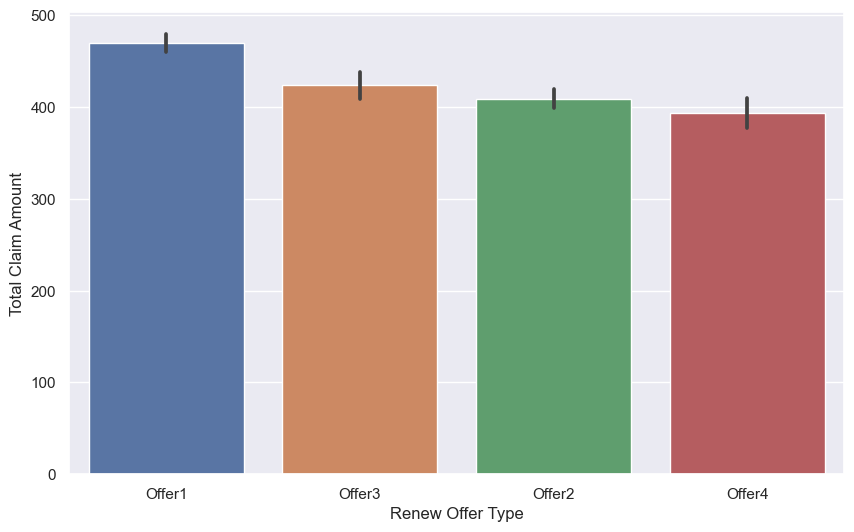

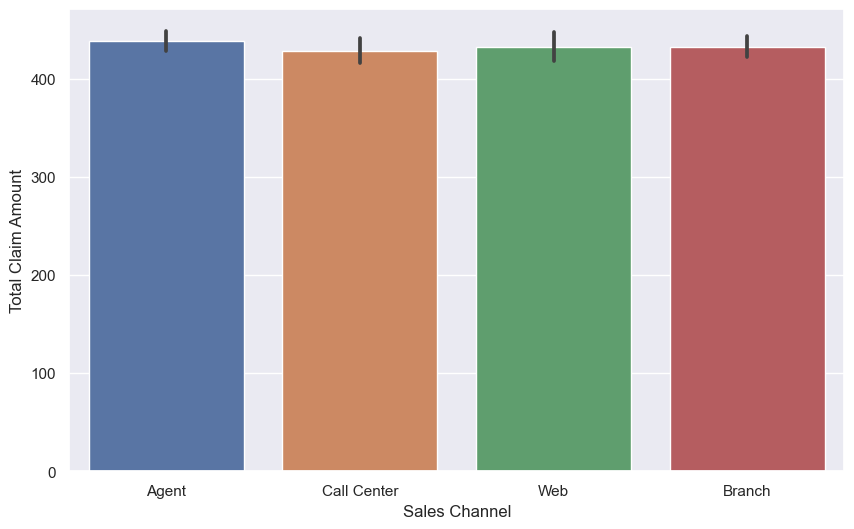

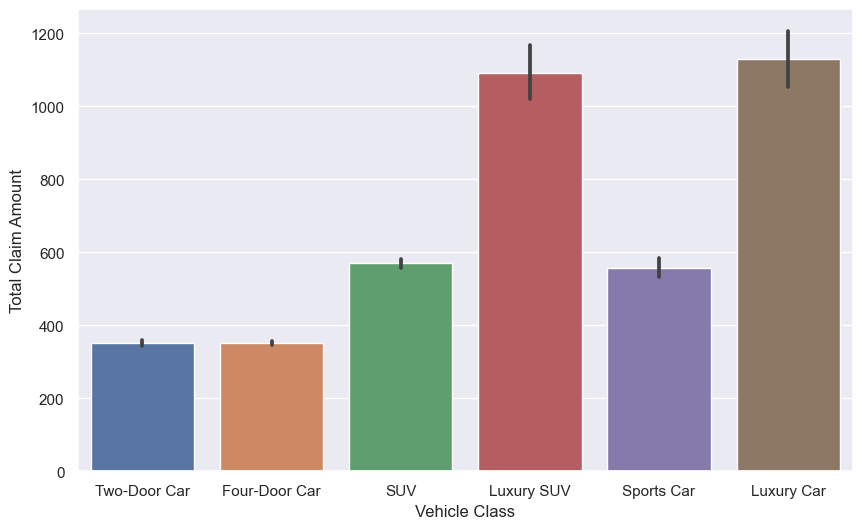

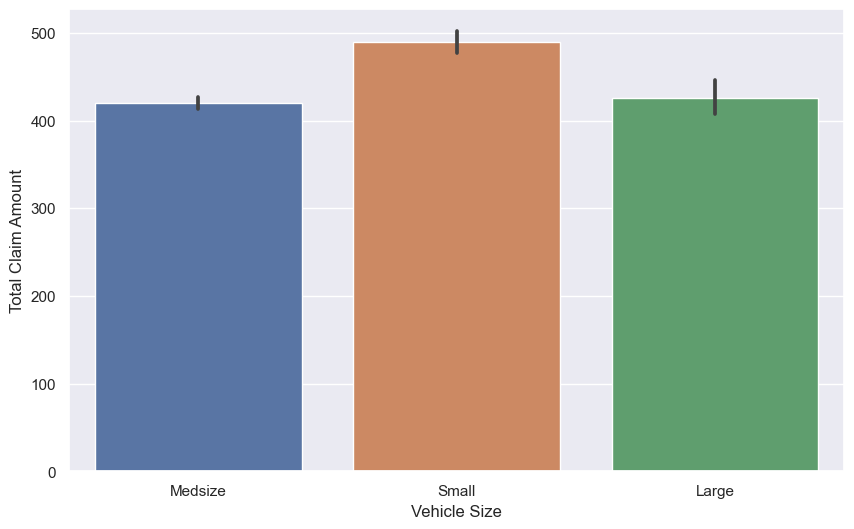

In [14]:
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical_df.columns:
    sns.barplot(x=categorical_df[i],y=numerical_df['Total Claim Amount'], data=customer_df)
    plt.show()

### 6. For the categorical data, check if there is any data cleaning that need to perform.
    #Hint: You can use the function value_counts() on each of the categorical columns
    #and check the representation of different categories in each column. 
    #Discuss if this information might in some way be used for data cleaning.

In [15]:
for i in categorical_df:
    categorical_df[i].value_counts()
    
    print(categorical_df[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [16]:
#Lab | Feature extraction
#For this lab, we will be using the same dataset we used in the previous labs. 
#We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

#Instructions

#1. Open the categoricals variable we created before.

categoricals = data.select_dtypes(np.object)
categoricals.head()

#2. Plot all the categorical variables with the proper plot. What can you see?

#3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

#4. Plot time variable. Can you extract something from it?

NameError: name 'data' is not defined

### 1. Open the categoricals variable we created before.

categoricals = data.select_dtypes(np.object)

categoricals.head()


In [18]:
categorical_df.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?


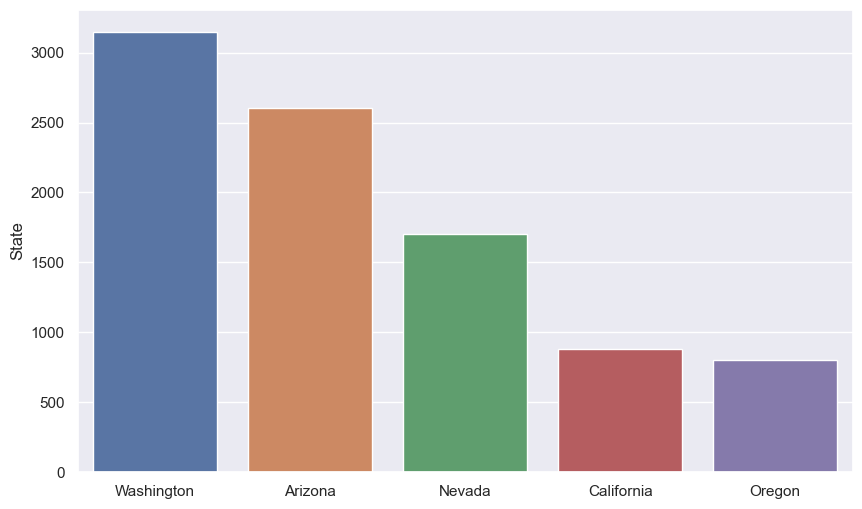

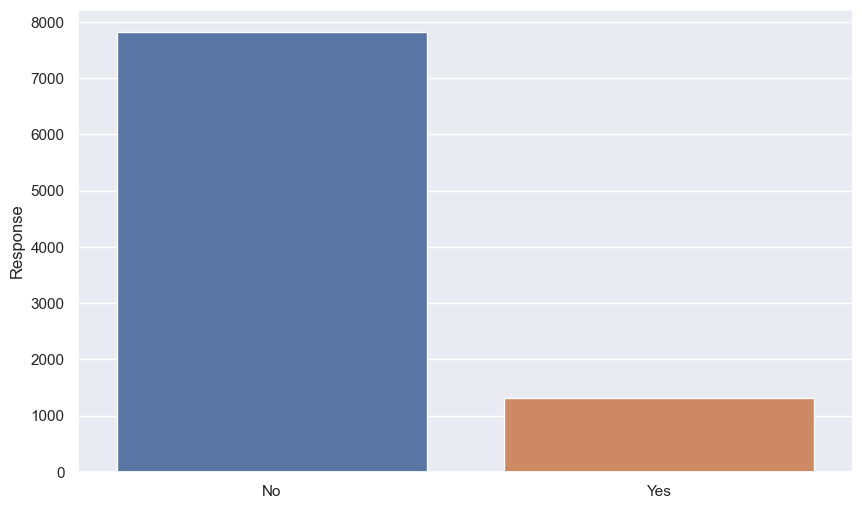

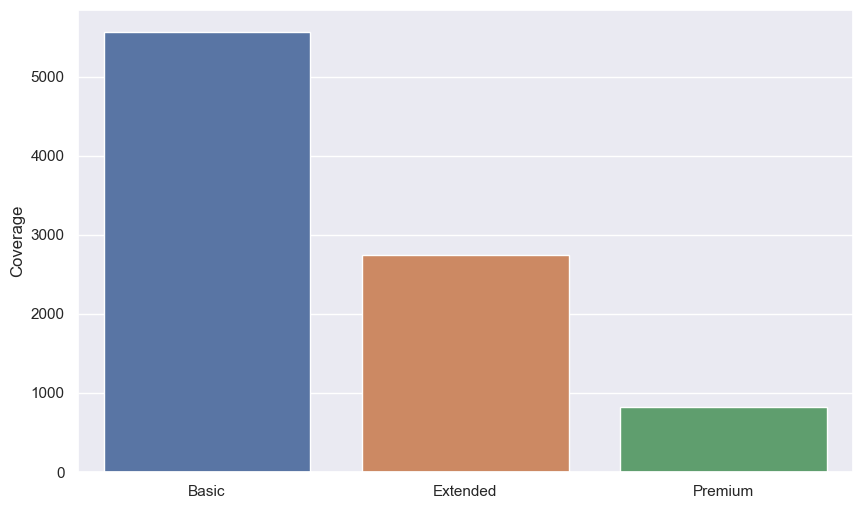

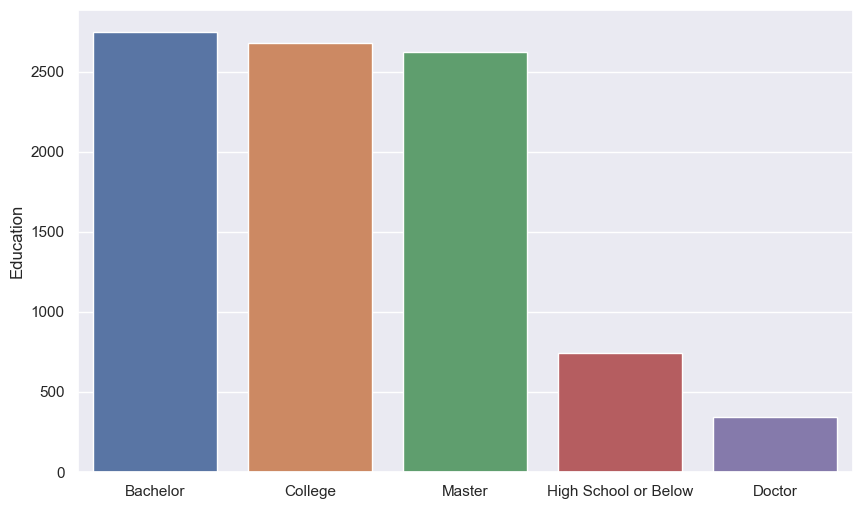

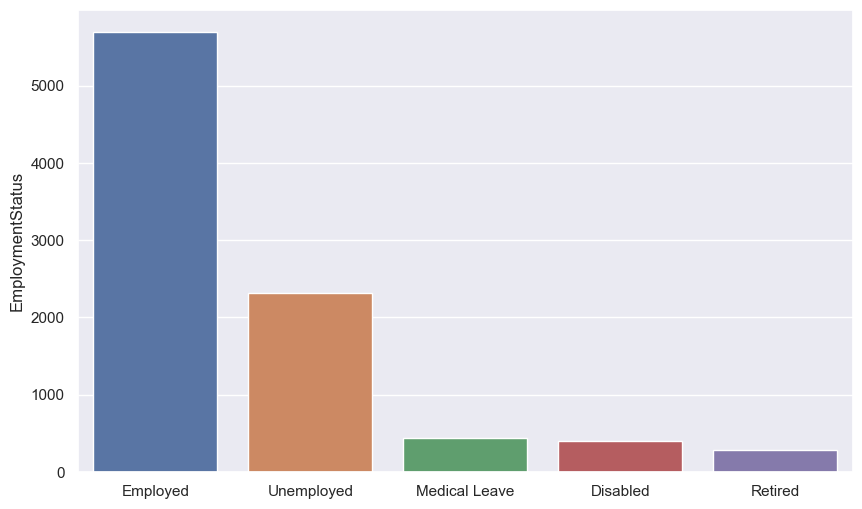

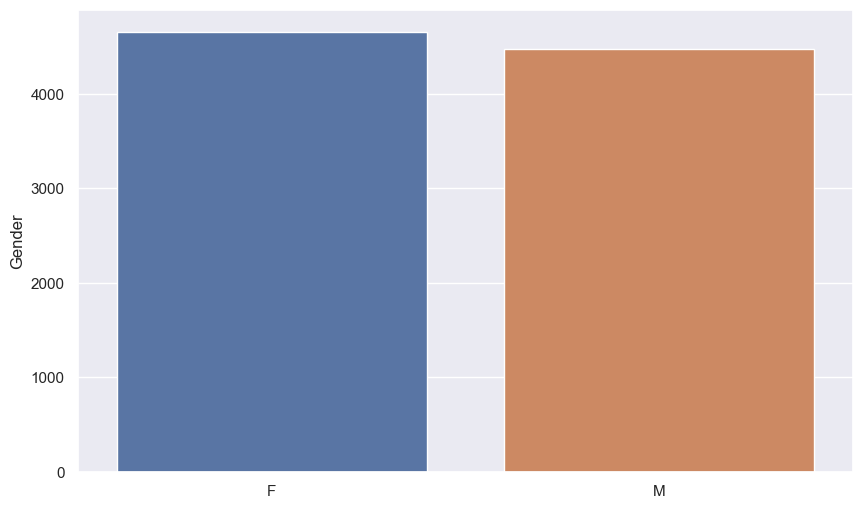

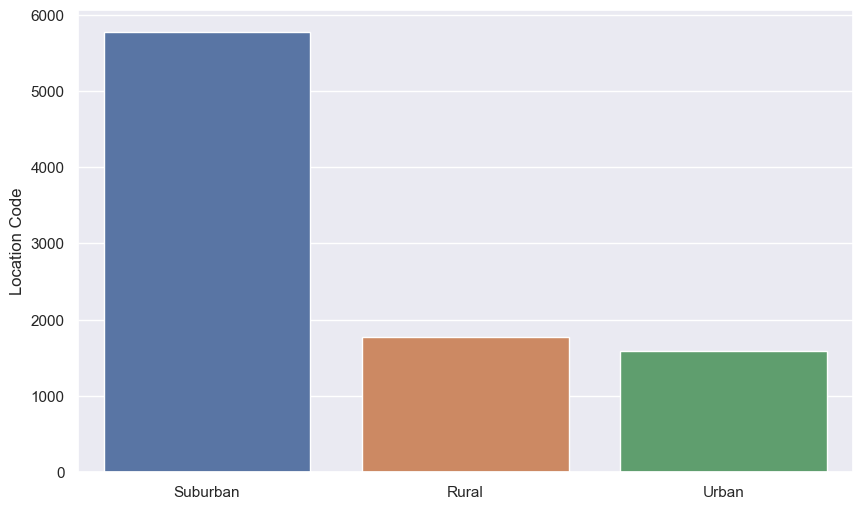

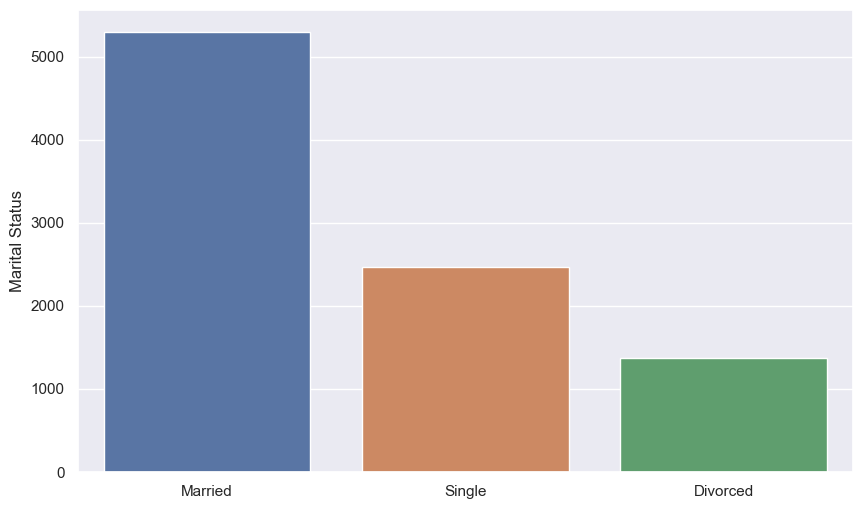

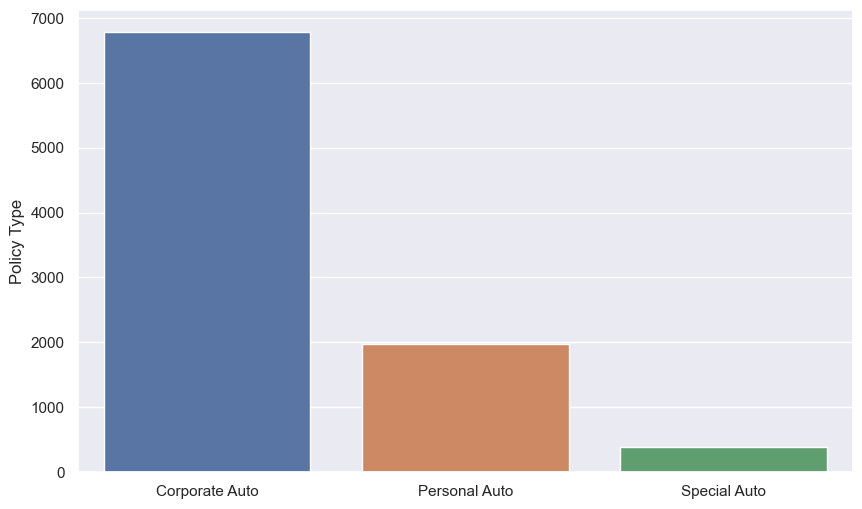

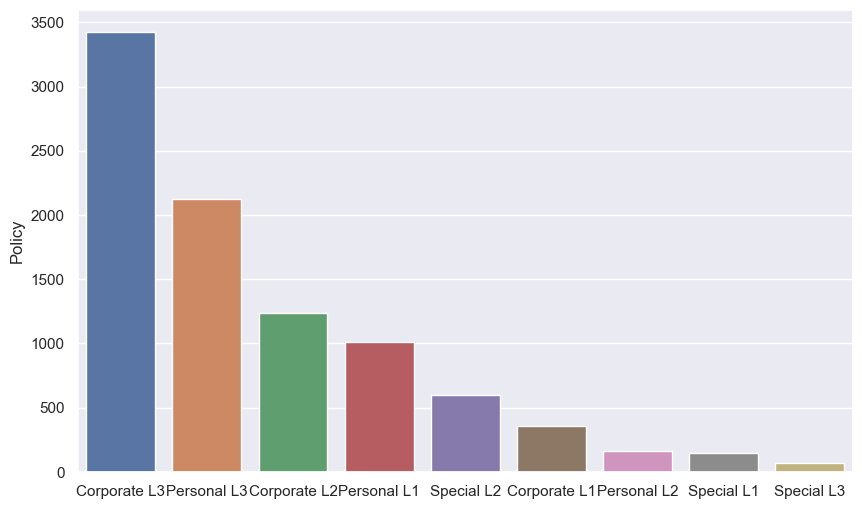

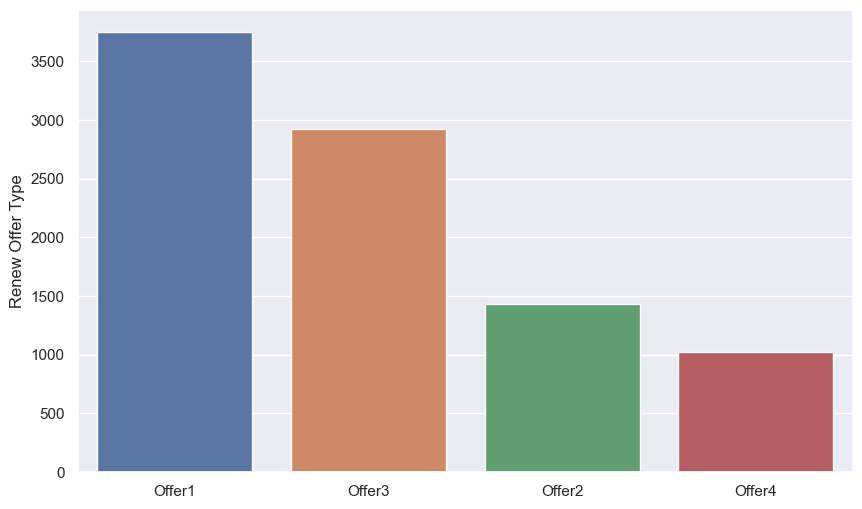

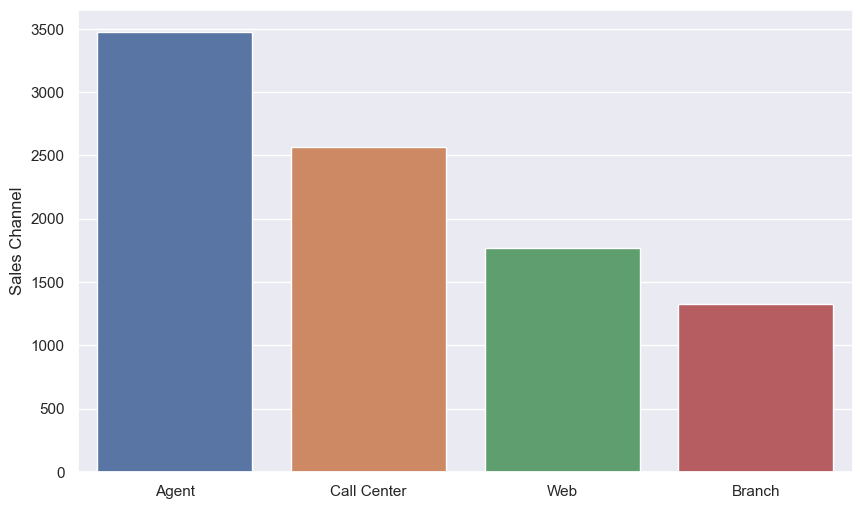

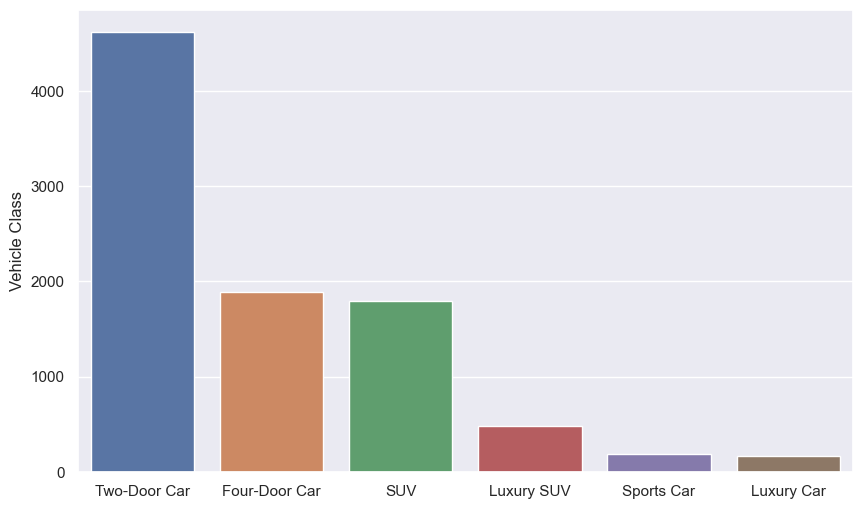

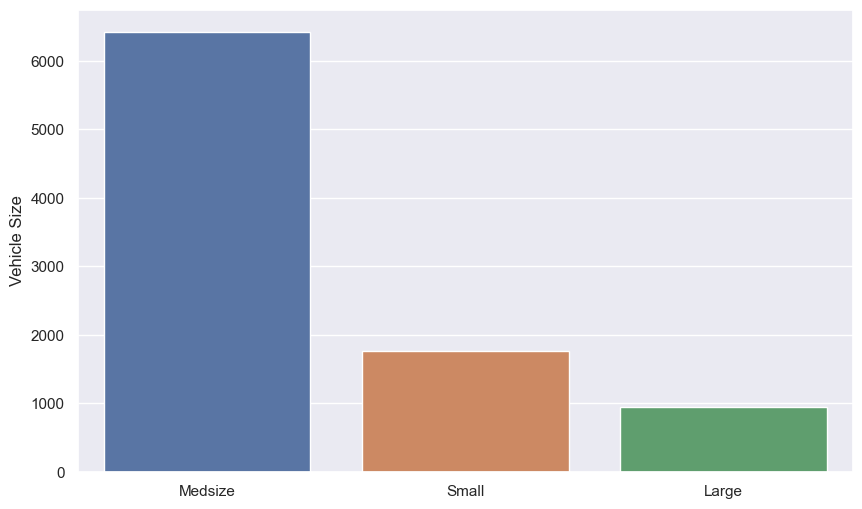

In [19]:
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical_df.columns:
    sns.barplot(x=categorical_df[i].unique(), y=categorical_df[i].value_counts(),data=categorical_df)
    plt.show()

In [20]:
categorical_df.isnull().sum()

State               0
Response            0
Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location Code       0
Marital Status      0
Policy Type         0
Policy              0
Renew Offer Type    0
Sales Channel       0
Vehicle Class       0
Vehicle Size        0
dtype: int64

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [21]:
for i in categorical_df:
    categorical_df[i].value_counts()
    
    print(categorical_df[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [22]:
#Definimos X
X_cat=customer_df.select_dtypes(include=np.object)

In [23]:
from sklearn import preprocessing
labels=X_cat.apply(preprocessing.LabelEncoder().fit_transform)
labels

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,1,1,1,1,1,4,2,1,0,0


In [24]:
corr_matrix=labels.corr()
corr_matrix

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
State,1.000000,-0.002473,0.002047,0.015755,0.000368,-0.004933,-0.005240,0.020371,0.008638,0.014241,-0.007194,-0.003080,0.011407,0.006846
Response,-0.002473,1.000000,0.000642,0.000285,-0.016703,0.004396,0.001729,-0.094843,0.001110,-0.001461,-0.162882,-0.086607,0.021225,-0.050691
Coverage,0.002047,0.000642,1.000000,0.021573,0.003239,-0.014448,-0.020176,0.002956,0.001469,-0.002317,-0.049092,-0.024638,-0.017682,-0.003775
Education,0.015755,0.000285,0.021573,1.000000,-0.025271,0.002206,-0.011533,0.005675,0.011650,0.011119,0.067838,-0.005018,0.010192,-0.005491
EmploymentStatus,0.000368,-0.016703,0.003239,-0.025271,1.000000,0.034960,0.015921,0.311563,-0.002240,-0.001159,-0.121378,-0.018346,-0.002443,-0.011253
Gender,-0.004933,0.004396,-0.014448,0.002206,0.034960,1.000000,0.003108,0.034027,-0.002227,-0.003123,0.045276,-0.020614,0.020043,-0.000347
Location Code,-0.005240,0.001729,-0.020176,-0.011533,0.015921,0.003108,1.000000,0.016452,0.015096,0.012086,-0.023625,-0.003953,0.001870,0.021230
Marital Status,0.020371,-0.094843,0.002956,0.005675,0.311563,0.034027,0.016452,1.000000,0.013052,0.008139,-0.025818,-0.017967,0.017597,0.017493
Policy Type,0.008638,0.001110,0.001469,0.011650,-0.002240,-0.002227,0.015096,0.013052,1.000000,0.879964,-0.000993,-0.000154,-0.004895,0.004450
Policy,0.014241,-0.001461,-0.002317,0.011119,-0.001159,-0.003123,0.012086,0.008139,0.879964,1.000000,-0.003654,-0.002125,-0.000223,-0.002232


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

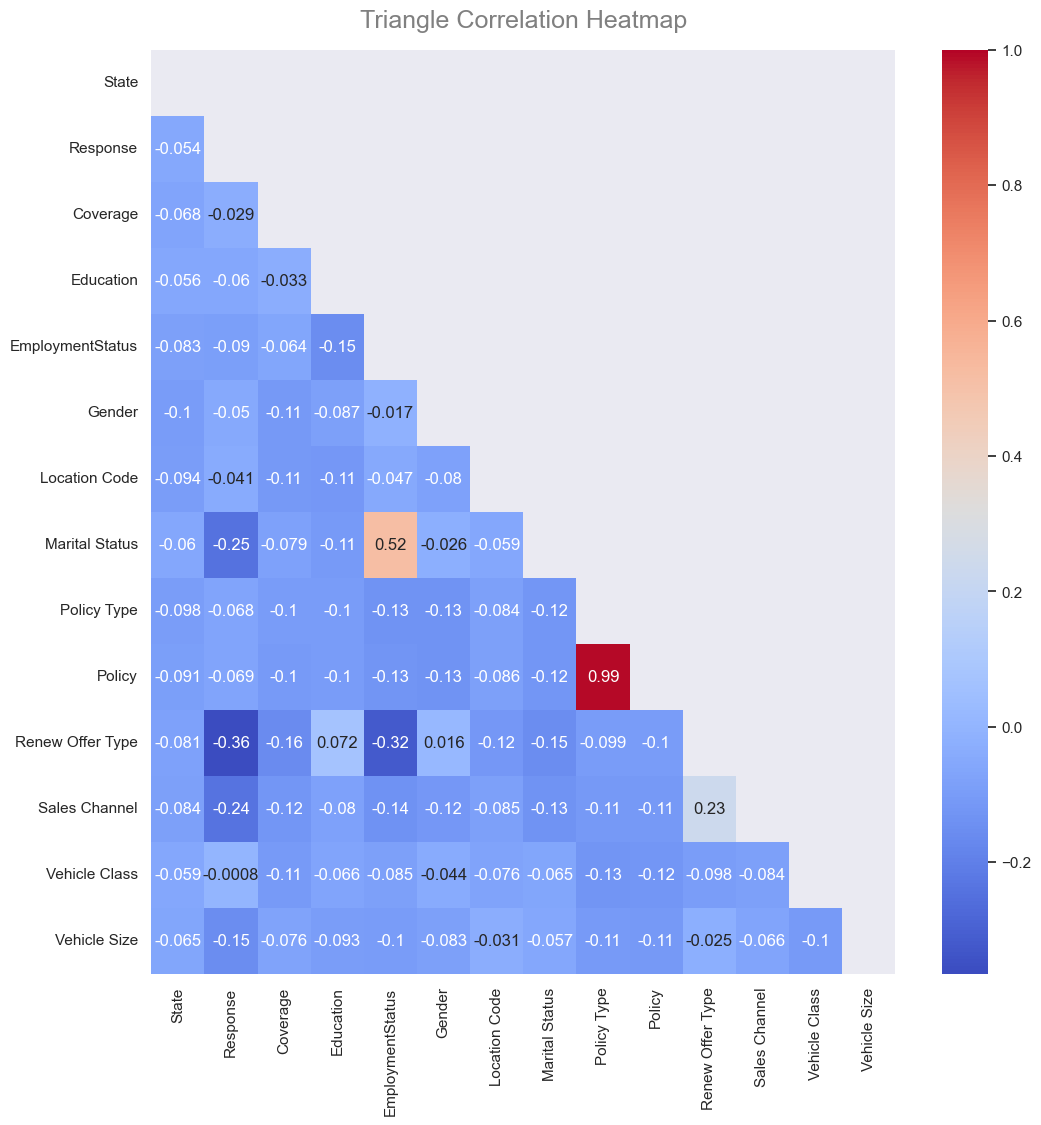

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
mascara=np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr_matrix.corr(), mask=mascara, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey')

In [ ]:
#Eliminamos columna de 'Policy' que tiene una altisima correlacion (.99) con 'Policy Type' 

In [26]:
categorical_df=categorical_df.drop(columns=['Policy'],axis=1)
categorical_df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


### 4. Plot time variable. Can you extract something from it?

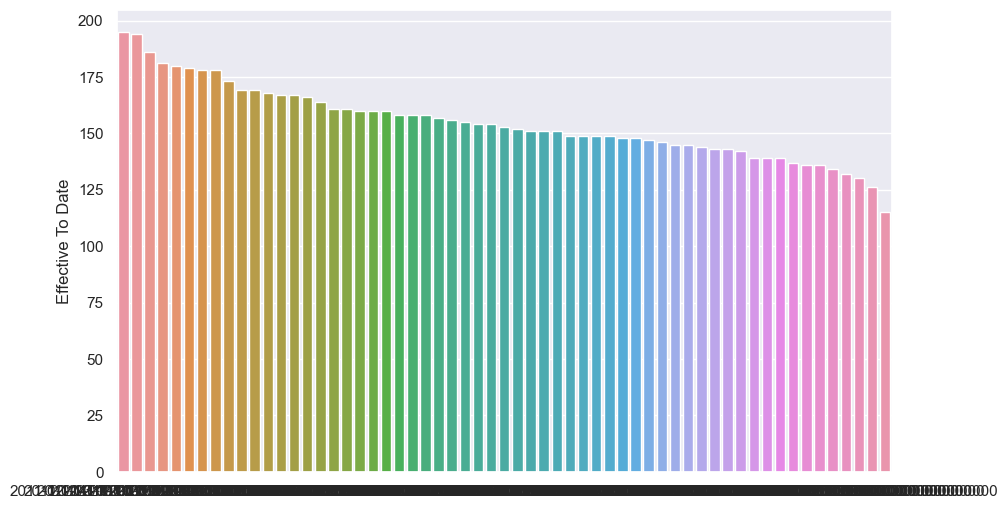

In [27]:
sns.barplot(x=numerical_df['Effective To Date'].unique(), y=numerical_df['Effective To Date'].value_counts(), data=numerical_df)
plt.show()

In [ ]:
#Not really, since the info is presented on every single date value, 
#it's not possible to determine which date belongs to which column.

In [ ]:
#Lab | Data cleaning and wrangling

#For this lab, we will be using the same dataset we used in the previous labs. 
#We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

#Instructions

#So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

#1. We will start with removing outliers. 
    #So far, we have discussed different methods to remove outliers. 
    #Use the one you feel more comfortable with, define a function for that. 
    #Use the function to remove the outliers and apply it to the dataframe.

#2. Create a copy of the dataframe for the data wrangling.

#3. Normalize the continuous variables. You can use any one method you want.

#4. Encode the categorical variables.

#5. The time variable can be useful. Try to transform its data into a useful one. 
    #Hint: Day week and month as integers might be useful.
    
#6. Since the model will only accept numerical data, 
    #check and make sure that every column is numerical, if some are not, change it using encoding.
    
#Hint for Categorical Variables

#You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

    #data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
    
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.

### 1. We will start with removing outliers. 
    #So far, we have discussed different methods to remove outliers. 
    #Use the one you feel more comfortable with, define a function for that. 
    #Use the function to remove the outliers and apply it to the dataframe.


In [28]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [30]:
customer_df.dtypes

State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                            object
Total Claim Amount                      

In [31]:
#Separamos variables categoricas
customer_cat=customer_df.select_dtypes(np.object)
customer_cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
#Separamos variables numericas
customer_num=customer_df.select_dtypes(np.number)
customer_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


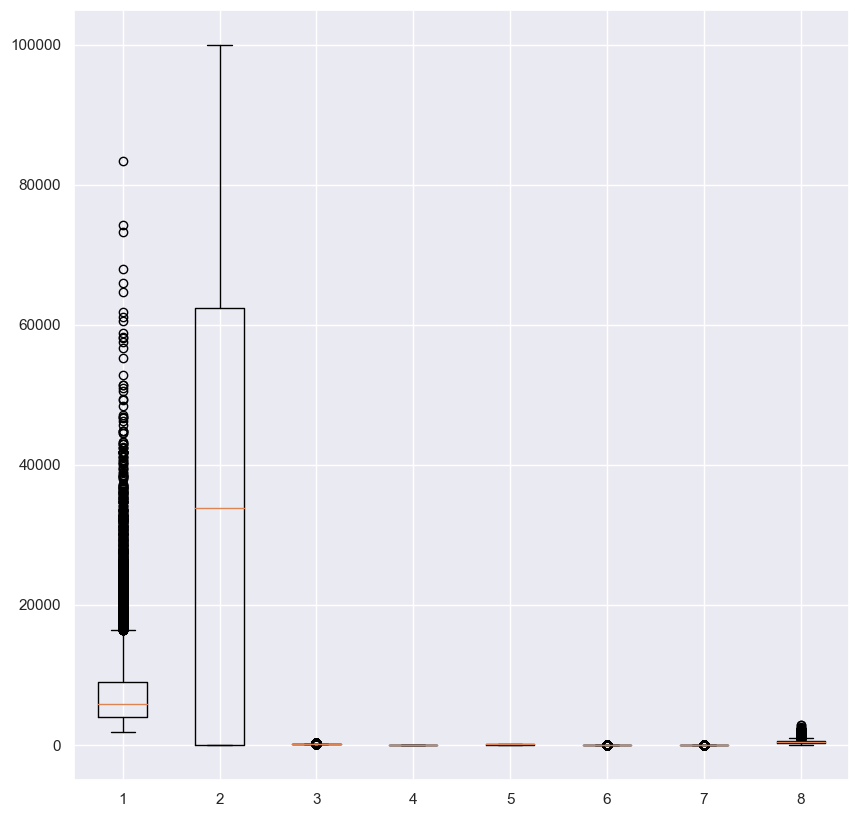

In [33]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(customer_num)
plt.show()

In [34]:
#Removiendo los outliers
def outliers(x):
    for i in x:
        q75,q25 = np.percentile(x[i].loc[:i],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        x.loc[x[i] < min,i] = np.NaN
        x.loc[x[i] > max,i] = np.NaN
    
    return x

In [35]:
outliers(customer_num)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,NaN
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879
...,...,...,...,...,...,...,...,...
9129,NaN,71941.0,73.0,18.0,89.0,0.0,2.0,198.234764
9130,3096.511217,21604.0,79.0,14.0,28.0,0.0,1.0,379.200000
9131,8163.890428,0.0,85.0,9.0,37.0,NaN,2.0,790.784983
9132,7524.442436,21941.0,96.0,34.0,3.0,0.0,3.0,691.200000


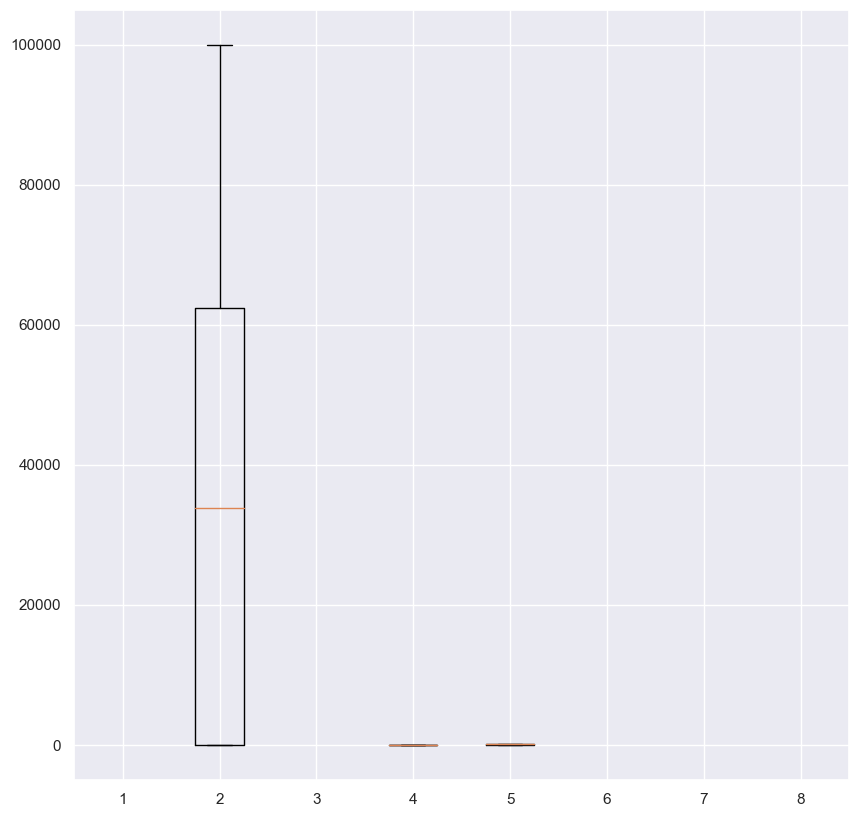

In [36]:
#Validamos que los outliers se hayan ido
fig = plt.figure(figsize =(10, 10))
plt.boxplot(customer_num)
plt.show()

In [37]:
customer_num.isnull().sum()

Customer Lifetime Value           817
Income                              0
Monthly Premium Auto              430
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints        1882
Number of Policies                416
Total Claim Amount                453
dtype: int64

In [38]:
#Rellenamos los nulos
for i in (customer_num.columns):
  customer_num[i]=customer_num[i].fillna(np.mean(customer_num[i]))

In [39]:
customer_num.isnull().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

### 2. Create a copy of the dataframe for the data wrangling.

In [60]:
customer_num2

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,Week,Day
0,2763.519279,56274,69,32,5,0,1,384.811147,2,8,24
1,6979.535903,0,94,13,42,0,8,1131.464935,1,5,31
2,12887.431650,48767,108,18,38,0,2,566.472247,2,7,19
3,7645.861827,0,106,18,65,0,7,529.881344,1,3,20
4,2813.692575,43836,73,12,44,0,1,138.130879,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2,6,10
9130,3096.511217,21604,79,14,28,0,1,379.200000,2,6,12
9131,8163.890428,0,85,9,37,3,2,790.784983,2,5,6
9132,7524.442436,21941,96,34,3,0,3,691.200000,2,5,3


In [64]:
X=customer_num2.drop(['Total Claim Amount'], axis=1)
y=customer_num2['Total Claim Amount']

### 3. Normalize the continuous variables. You can use any one method you want.

In [65]:
from sklearn.preprocessing import Normalizer
transformer =Normalizer().fit(X)
x_norm= transformer.transform(X)

In [66]:
X=pd.DataFrame(x_norm)
print(X.head())

          0         1         2         3         4    5         6         7  \
0  0.049049  0.998795  0.001225  0.000568  0.000089  0.0  0.000018  0.000035   
1  0.999879  0.000000  0.013466  0.001862  0.006017  0.0  0.001146  0.000143   
2  0.255494  0.966808  0.002141  0.000357  0.000753  0.0  0.000040  0.000040   
3  0.999861  0.000000  0.013862  0.002354  0.008500  0.0  0.000915  0.000131   
4  0.064055  0.997944  0.001662  0.000273  0.001002  0.0  0.000023  0.000046   

          8         9  
0  0.000142  0.000426  
1  0.000716  0.004441  
2  0.000139  0.000377  
3  0.000392  0.002615  
4  0.000114  0.000068  


### 4. Encode the categorical variables.

In [ ]:
#Hint for Categorical Variables

#You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

    #data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.

In [72]:
customer_cat_one=customer_cat.drop(['Coverage','EmploymentStatus','Location Code','Vehicle Size'],axis=1)
customer_cat_one

,State,Response,Education,Gender,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class
0,Washington,No,Bachelor,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Bachelor,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Bachelor,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Bachelor,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Bachelor,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Bachelor,M,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car
9130,California,Yes,College,F,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car
9131,California,No,Bachelor,M,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car
9132,California,No,College,M,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car


In [74]:
#Vamos a tratar los datos categoricos solicitados con One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(customer_cat_one)
encoder=encoder.transform(customer_cat_one).toarray()
encoder=pd.DataFrame(encoder)
encoder

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Vamos a tratar los datos categoricos solicitados con Ordinal
customer_cat_ord=customer_cat.drop(['State','Response','Education','Gender','Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class'],axis=1)
customer_cat_ord

,Coverage,EmploymentStatus,Location Code,Policy Type,Vehicle Size
0,Basic,Employed,Suburban,Corporate Auto,Medsize
1,Extended,Unemployed,Suburban,Personal Auto,Medsize
2,Premium,Employed,Suburban,Personal Auto,Medsize
3,Basic,Unemployed,Suburban,Corporate Auto,Medsize
4,Basic,Employed,Rural,Personal Auto,Medsize
...,...,...,...,...,...
9129,Basic,Employed,Urban,Personal Auto,Medsize
9130,Extended,Employed,Suburban,Corporate Auto,Medsize
9131,Extended,Unemployed,Suburban,Corporate Auto,Medsize
9132,Extended,Employed,Suburban,Personal Auto,Large


In [77]:
from sklearn.preprocessing import OrdinalEncoder
encoder2=OrdinalEncoder()
encoder2=encoder2.fit_transform(customer_cat_ord)
encoder2=pd.DataFrame(encoder2)
encoder2

,0,1,2,3,4
0,0.0,1.0,1.0,0.0,1.0
1,1.0,4.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0,1.0
3,0.0,4.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...
9129,0.0,1.0,2.0,1.0,1.0
9130,1.0,1.0,1.0,0.0,1.0
9131,1.0,4.0,1.0,0.0,1.0
9132,1.0,1.0,1.0,1.0,0.0


In [78]:
categorical_encode=np.concatenate((encoder,encoder2),axis=1)
categorical_encode=pd.DataFrame(categorical_encode)
categorical_encode

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,1.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


### 5. The time variable can be useful. Try to transform its data into a useful one. 
    #Hint: Day week and month as integers might be useful.
    

In [44]:
print(customer_df['Effective To Date'])

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective To Date, Length: 9134, dtype: datetime64[ns]


In [45]:
customer_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,390.034963
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879
...,...,...,...,...,...,...,...,...
9129,6279.177892,71941.0,73.0,18.0,89.0,0.0,2.0,198.234764
9130,3096.511217,21604.0,79.0,14.0,28.0,0.0,1.0,379.200000
9131,8163.890428,0.0,85.0,9.0,37.0,0.0,2.0,790.784983
9132,7524.442436,21941.0,96.0,34.0,3.0,0.0,3.0,691.200000


In [51]:
customer_df['Month']=customer_df['Effective To Date'].dt.month
customer_df['Week']=customer_df['Effective To Date'].dt.week
customer_df['Day']=customer_df['Effective To Date'].dt.day

In [52]:
customer_df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,Week,Day
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,8,24
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,5,31
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,7,19
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,3,20
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2,6,10
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,6,12
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,5,6
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2,5,3


### 6. Since the model will only accept numerical data, 
    #check and make sure that every column is numerical, if some are not, change it using encoding.

In [59]:
customer_num2=customer_df.select_dtypes(np.number)
customer_num2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,Week,Day
0,2763.519279,56274,69,32,5,0,1,384.811147,2,8,24
1,6979.535903,0,94,13,42,0,8,1131.464935,1,5,31
2,12887.431650,48767,108,18,38,0,2,566.472247,2,7,19
3,7645.861827,0,106,18,65,0,7,529.881344,1,3,20
4,2813.692575,43836,73,12,44,0,1,138.130879,2,5,3


In [79]:
#Concatenamos la nueva tabla con datos numericos junto con la tabla numerica original
Xcon=np.concatenate((X,categorical_encode),axis=1)
Xcon=pd.DataFrame(Xcon)
Xcon

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000000,0.000018,0.000035,0.000142,0.000426,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.999879,0.000000,0.013466,0.001862,0.006017,0.000000,0.001146,0.000143,0.000716,0.004441,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000000,0.000040,0.000040,0.000139,0.000377,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0
3,0.999861,0.000000,0.013862,0.002354,0.008500,0.000000,0.000915,0.000131,0.000392,0.002615,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000000,0.000023,0.000046,0.000114,0.000068,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.309387,0.950935,0.000965,0.000238,0.001176,0.000000,0.000026,0.000026,0.000079,0.000132,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
9130,0.141879,0.989876,0.003620,0.000641,0.001283,0.000000,0.000046,0.000092,0.000275,0.000550,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9131,0.999934,0.000000,0.010411,0.001102,0.004532,0.000367,0.000245,0.000245,0.000612,0.000735,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,1.0
9132,0.324391,0.945913,0.004139,0.001466,0.000129,0.000000,0.000129,0.000086,0.000216,0.000129,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
#Lab | Comparing regression models

#For this lab, we will be using the same dataset we used in the previous labs. 
#We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

#Instructions

#1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
#2. Try a simple linear regression with all the data to see whether we are getting good results.
#3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot 
    #of them without repeating code.
#4. Use the function to check LinearRegressor and KNeighborsRegressor.
#5. You can check also the MLPRegressor for this task!
#6. Check and discuss the results.

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [107]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [108]:
Xcon_train,Xcon_test,y_train,y_test=train_test_split(Xcon,y,test_size=0.3,random_state=100)

### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [109]:
lm = linear_model.LinearRegression()
model = lm.fit(Xcon_train,y_train)
predictions = model.predict(Xcon_test)

In [110]:
print('R2',r2_score(y_test, predictions))
print('MSE',mean_squared_error(y_test, predictions))
print('MAE',mean_absolute_error(y_test, predictions))
print('sqrt(MSE)',np.sqrt(mean_squared_error(y_test, predictions)))

R2 0.603163931031975
MSE 31681.016503551546
MAE 133.2887728364203
sqrt(MSE) 177.99161919470126


### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot 
    #of them without repeating code.

In [124]:
def try_models(Xcon_train, y_train, Xcon_test, y_test):
   
    models = [KNeighborsRegressor(n_neighbors=5), LinearRegression()]
    model_names = ['KNeighborsRegressor','LinearRegression']

    for i, model in enumerate(models):
        model.fit(Xcon_train, y_train)
        y_pred = model.predict(Xcon_test)
        r2 = r2_score(y_test, y_pred)
        print(f"{model_names[i]} R-squared score: {r2:.4f}")

### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [126]:
print(try_models(Xcon_train, y_train, Xcon_test, y_test))

KNeighborsRegressor R-squared score: 0.5120
LinearRegression R-squared score: 0.6032
None


### 5. You can check also the MLPRegressor for this task!

In [127]:
    models = [MLPRegressor()]
    model_names = ['MLPRegressor']

    for i, model in enumerate(models):
        model.fit(Xcon_train, y_train)
        y_pred = model.predict(Xcon_test)
        r2 = r2_score(y_test, y_pred)
        print(f"{model_names[i]} R-squared score: {r2:.4f}")
        
try_models

MLPRegressor R-squared score: 0.7141


<function __main__.try_models(Xcon_train, y_train, Xcon_test, y_test)>

### 6. Check and discuss the results.

In [ ]:
#MLPRegressor has the highest R2 score of all the models we tested.